In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf

In [50]:
df = pd.read_csv("titanic/train.csv")

In [188]:
data_test = pd.read_csv("titanic/test.csv")

In [52]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
data_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [54]:
features = ["PassengerId" , "Pclass" , 'Sex' , 'SibSp' , "Parch" ,"Fare" ,"Embarked"]
final_test_data = data_test[features]

In [55]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [56]:
### figuring unique values in Embarked column

In [57]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [58]:
## figuring unique values in Cabin column to see if we could change them in numbers

In [59]:
print(df["Cabin"].unique())
print(len(df["Cabin"].unique()))

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
148


In [60]:
## creating another dataframe with "Tickets" and "Cabin" columns removed

In [61]:
data = df
data = data.drop('Ticket' , axis = 1)
data = data.drop("Cabin" , axis = 1)
data = data.drop("Name" , axis = 1)
data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [62]:
## defining a function to change Embarked columns into numbers giving S = 2 , C = 1, Q = 0

In [63]:
def manipulated_embarked(x):
    if(x == "S"):
        return 2
    elif(x == "C"):
        return 1
    elif(x == "Q"):
        return 0

In [64]:
def manipulated_sex(x):
    if(x == "male"):
        return 1
    elif(x == "female"):
        return 0


In [65]:
i = 0
for x in data["Embarked"]:
    data["Embarked"][i] = manipulated_embarked(x)
    i += 1

<ipython-input-65-938ae29e186a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Embarked"][i] = manipulated_embarked(x)


In [66]:
i = 0
for x in final_test_data["Embarked"]:
    final_test_data["Embarked"][i] = manipulated_embarked(x)
    i+=1

<ipython-input-66-56b56df9618f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_test_data["Embarked"][i] = manipulated_embarked(x)
C:\Users\shri\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [67]:
i = 0
for x in final_test_data["Sex"]:
    final_test_data["Sex"][i] = manipulated_sex(x)
    i+=1

<ipython-input-67-8aff75caf9ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_test_data["Sex"][i] = manipulated_sex(x)


In [68]:
print(final_test_data["Embarked"].isnull().any())
print(final_test_data.isnull().any())

False
PassengerId    False
Pclass         False
Sex            False
SibSp          False
Parch          False
Fare            True
Embarked       False
dtype: bool


In [69]:
final_test_data = final_test_data.drop("Fare" , axis = 1)

In [70]:
final_test_data.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked
0,892,3,1,0,0,0
1,893,3,0,1,0,2
2,894,2,1,0,0,0
3,895,3,1,0,0,2
4,896,3,0,1,1,2


In [71]:
data["Embarked"].unique()

array([2, 1, 0, None], dtype=object)

In [72]:
### doing same with Sex male = 1 and Female = 0

In [73]:
i = 0
for x in data["Sex"]:
    data["Sex"][i] = manipulated_sex(x)
    i += 1

<ipython-input-73-cd0098ace99c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Sex"][i] = manipulated_sex(x)


In [74]:
data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [75]:
### checking if the data contains any nan value

In [76]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age             True
SibSp          False
Parch          False
Fare           False
Embarked        True
dtype: bool

In [77]:
age_null = pd.isnull(data["Age"])
embarked_null = pd.isnull(data["Embarked"])    ## isnull() returns Series with nan values
print(data[age_null].shape)
print(data[embarked_null].shape)

(177, 9)
(2, 9)


In [78]:
## handling embarked null values
print(data[embarked_null])
print(data["Embarked"][(data["Sex"]== 0) & (data["Pclass"] == 1) ].value_counts())

     PassengerId  Survived  Pclass Sex   Age  SibSp  Parch  Fare Embarked
61            62         1       1   0  38.0      0      0  80.0     None
829          830         1       1   0  62.0      0      0  80.0     None
2    48
1    43
0     1
Name: Embarked, dtype: int64


In [79]:
## in the above cell we can see that for the following conditions matching Embarked == Nan most suitable value will be 2

data["Embarked"][61] = 2
data["Embarked"][829] = 2

<ipython-input-79-80b16e0540c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Embarked"][61] = 2
<ipython-input-79-80b16e0540c5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Embarked"][829] = 2


In [80]:
### let us find average age of survivors and non survivors and put them in respective nan places

In [81]:
## or let us drop age column for a sec and see

In [82]:
final_data = data.drop("Age" , axis = 1)

In [85]:
print(final_data.columns)
print(final_test_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')


In [112]:
### dropping fare from trainining_data_set
training_data_set = final_data.drop("Fare" , axis = 1)

### picking out labels from train data

training_labels = training_data_set["Survived"]
training_data_set = training_data_set.drop("Survived" , axis = 1)

In [113]:
print(training_data_set.columns)
print(final_test_data.columns)

Index(['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')
Index(['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')


In [114]:
## now all we have is numerical data
### having a look at pair plot

In [115]:
normalized_training_data = (training_data_set - training_data_set.min())/(training_data_set.max()-training_data_set.min())
normalized_test_data =  (final_test_data - final_test_data.min())/(final_test_data.max()-final_test_data.min())

In [116]:
normalized_training_data = normalized_training_data.astype('float64')
normalized_test_data = normalized_test_data.astype('float64')

In [161]:
print(normalized_training_data.columns)
print(normalized_test_data.columns)

Index(['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked',
       'Survived'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')


In [117]:
normalized_test_data.head(5)

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked
0,0.000000,1.0,1.0,0.000,0.000000,0.0
1,0.002398,1.0,0.0,0.125,0.000000,1.0
2,0.004796,0.5,1.0,0.000,0.000000,0.0
3,0.007194,1.0,1.0,0.000,0.000000,1.0
4,0.009592,1.0,0.0,0.125,0.111111,1.0


In [119]:
normalized_training_data["Survived"] = training_labels

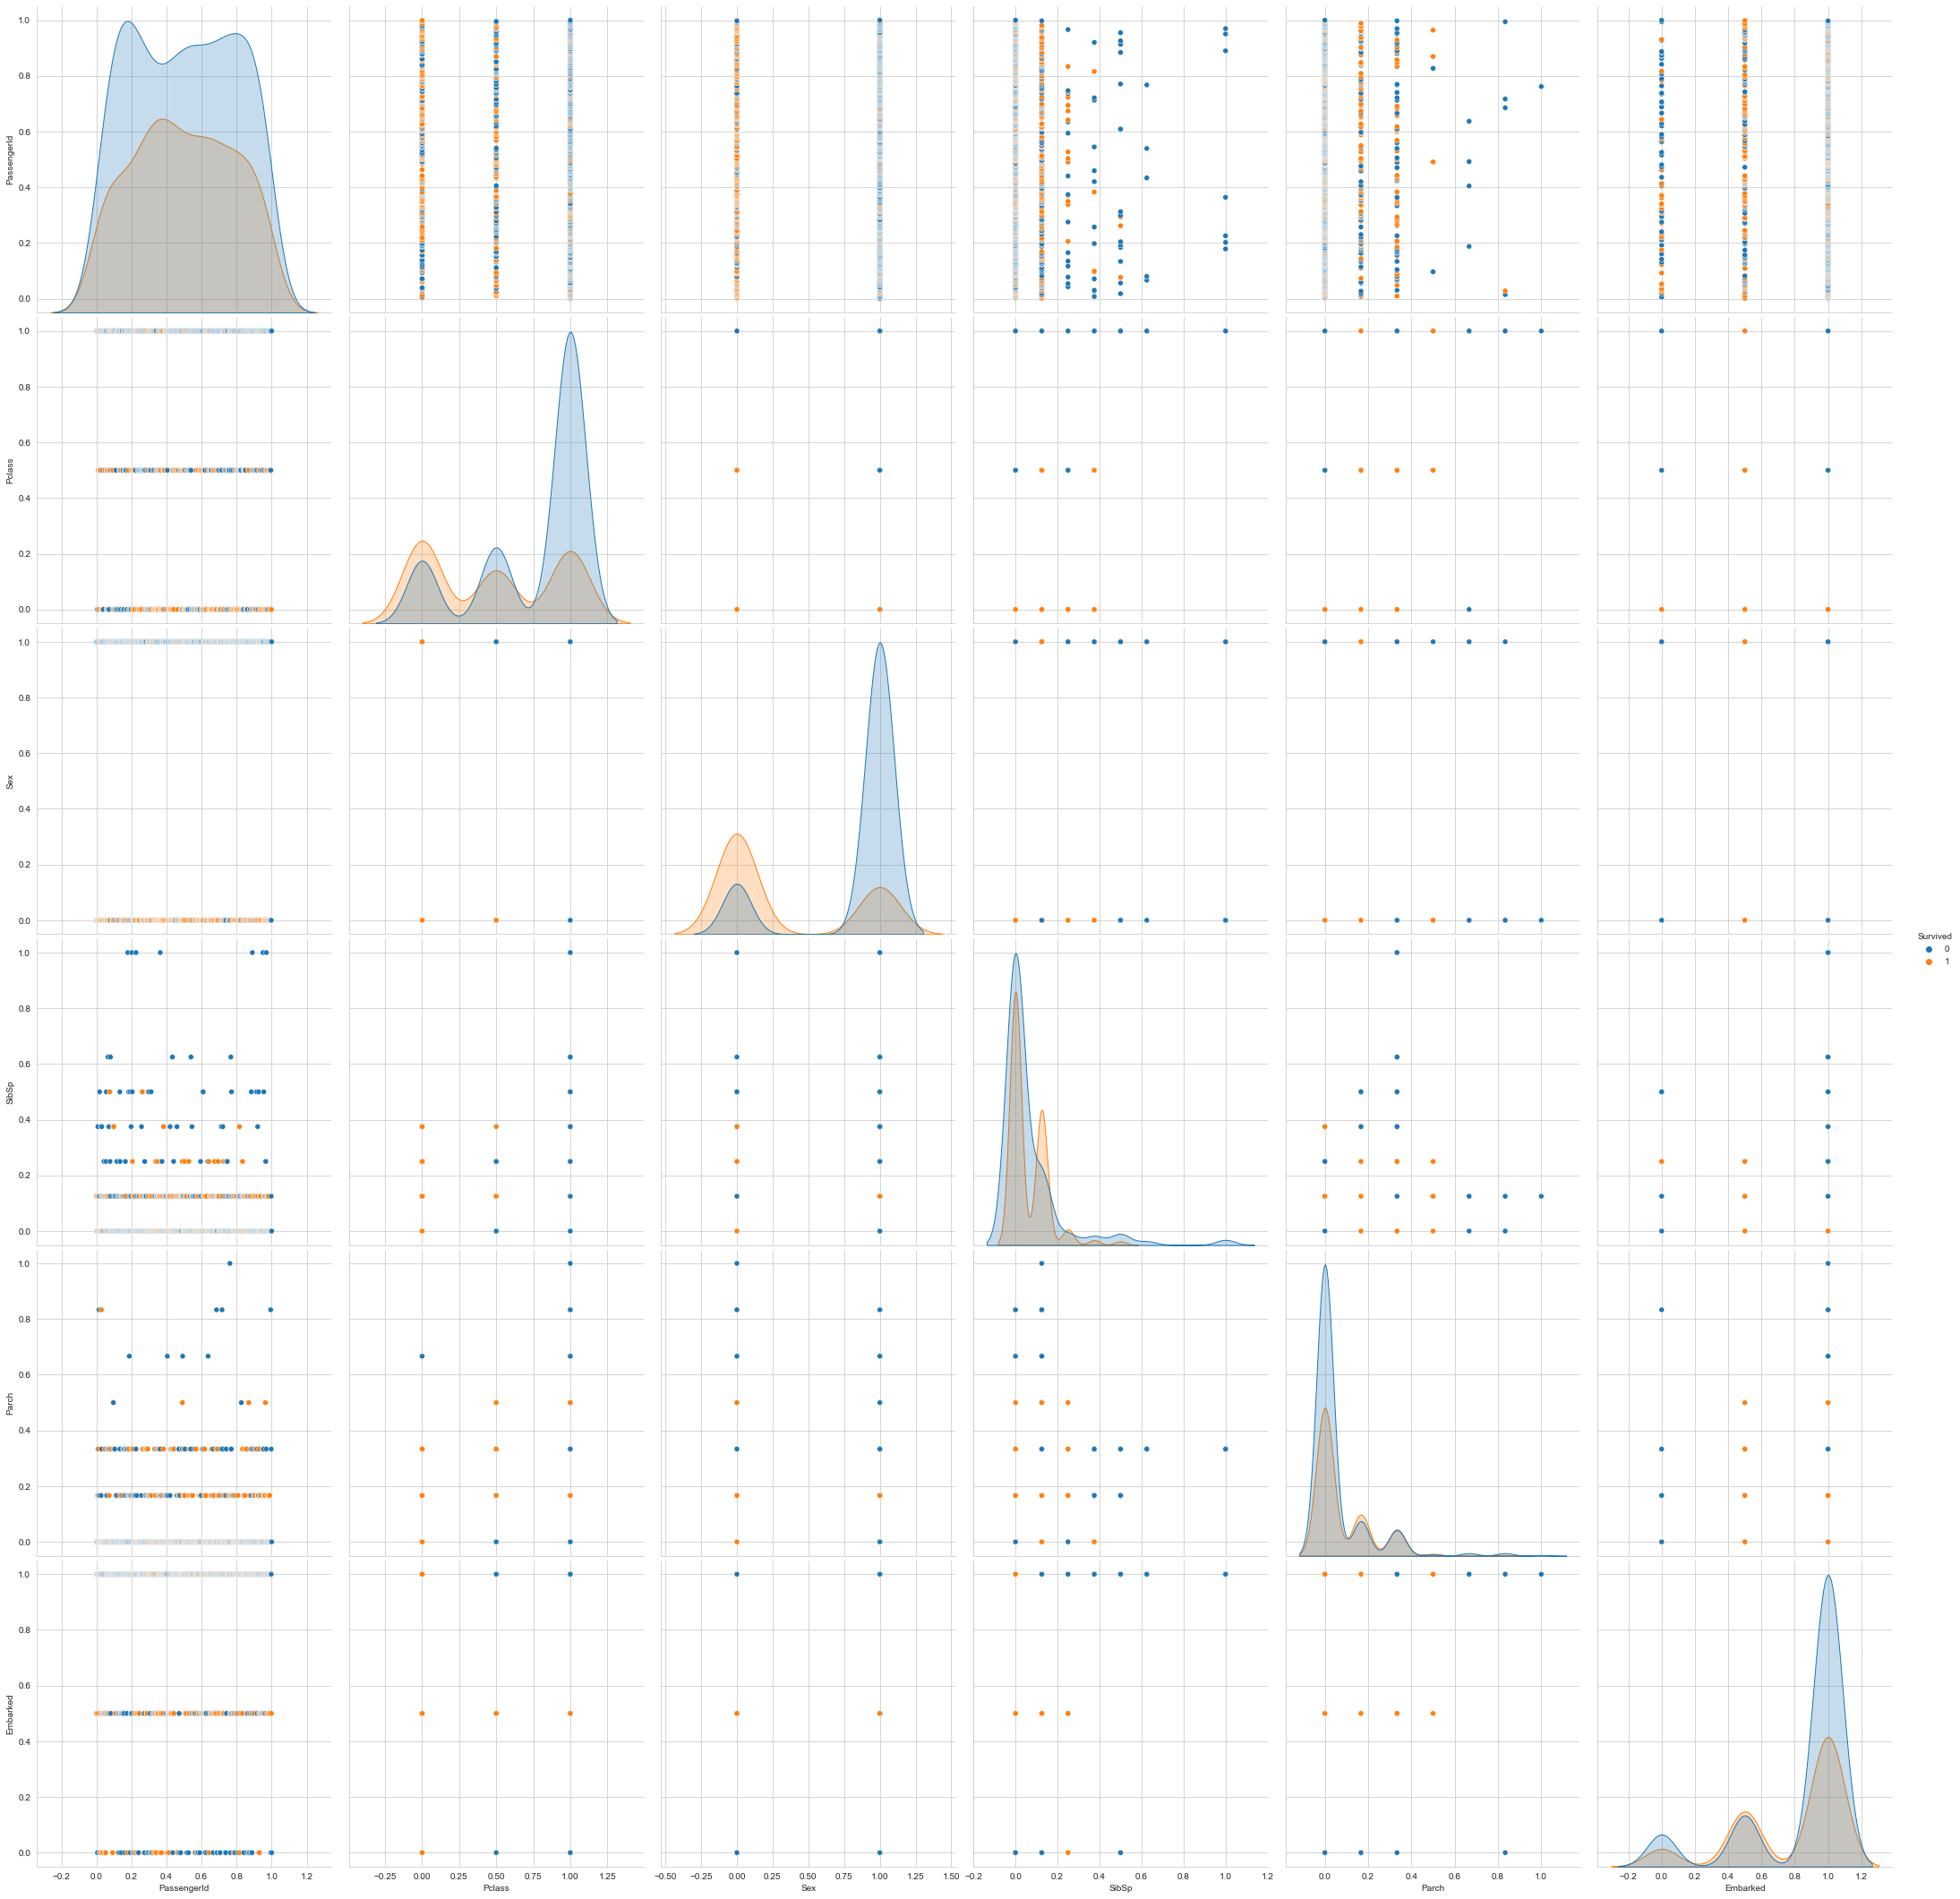

In [120]:
sns.set_style("whitegrid")
sns.pairplot(normalized_training_data, hue = "Survived" , height = 5)
plt.show()

In [121]:
### going to visualise the normalised training_data

In [123]:
training_data = normalized_training_data.drop("Survived" , axis = 1)
pca = PCA(n_components = 2)
training_data2d = pca.fit_transform(training_data)
training_data3d = np.vstack((training_data2d.T,training_labels)).T
training_dataframe = pd.DataFrame(training_data3d , columns = ("c1" , "c2" , "label"))

In [124]:
training_dataframe.head(5)

,c1,c2,label
0,-0.455282,-0.212964,0.0
1,0.873979,0.301111,1.0
2,0.469555,-0.532190,1.0
3,0.823836,0.386870,1.0
4,-0.458555,-0.206788,0.0


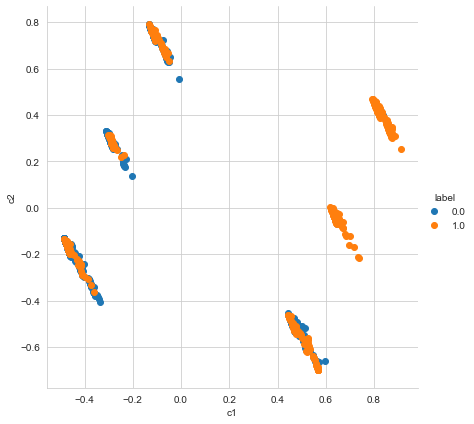

In [125]:
sns.FacetGrid(training_dataframe , hue ="label" , height = 6).map(plt.scatter , "c1" , "c2").add_legend()
plt.show()

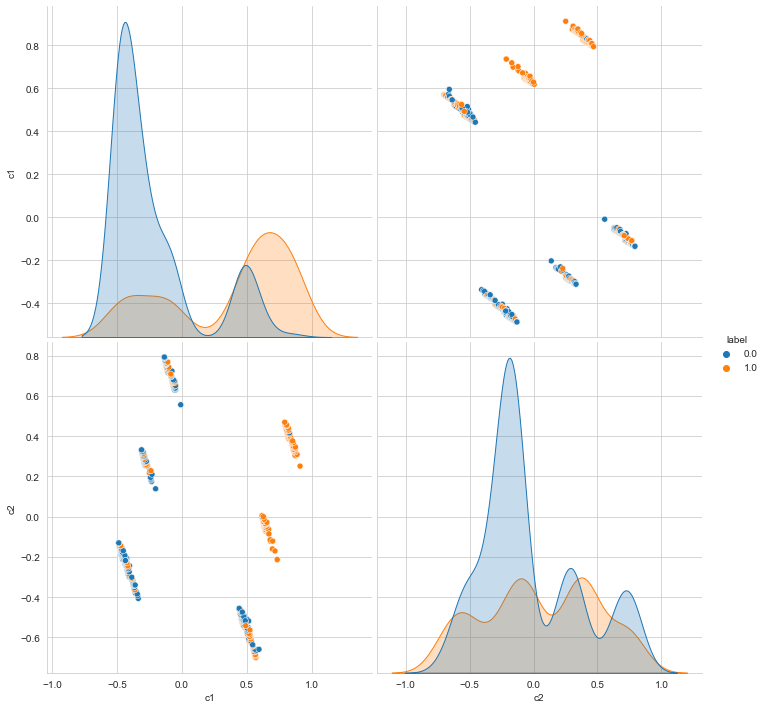

In [127]:
sns.set_style("whitegrid")
sns.pairplot(training_dataframe, hue = "label" , height = 5)
plt.show()

In [129]:
##visualising through TSNE

In [137]:
tsne = TSNE(n_components = 2 , perplexity = 2)
training_data2d = tsne.fit_transform(training_data_set)
training_data3d = np.vstack((training_data2d.T , training_labels)).T
training_dataframe = pd.DataFrame(training_data3d , columns = ("c1" , "c2" , "labels"))

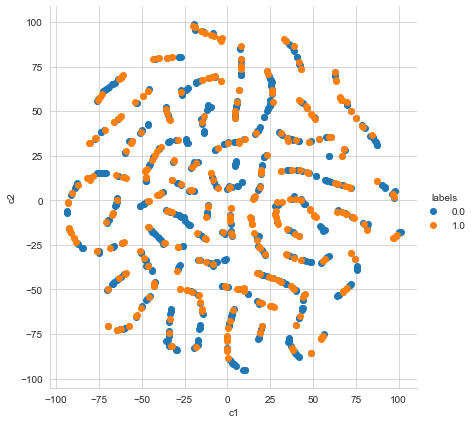

In [138]:
sns.FacetGrid(training_dataframe , hue = "labels" , height = 6).map(plt.scatter , "c1" , "c2").add_legend()

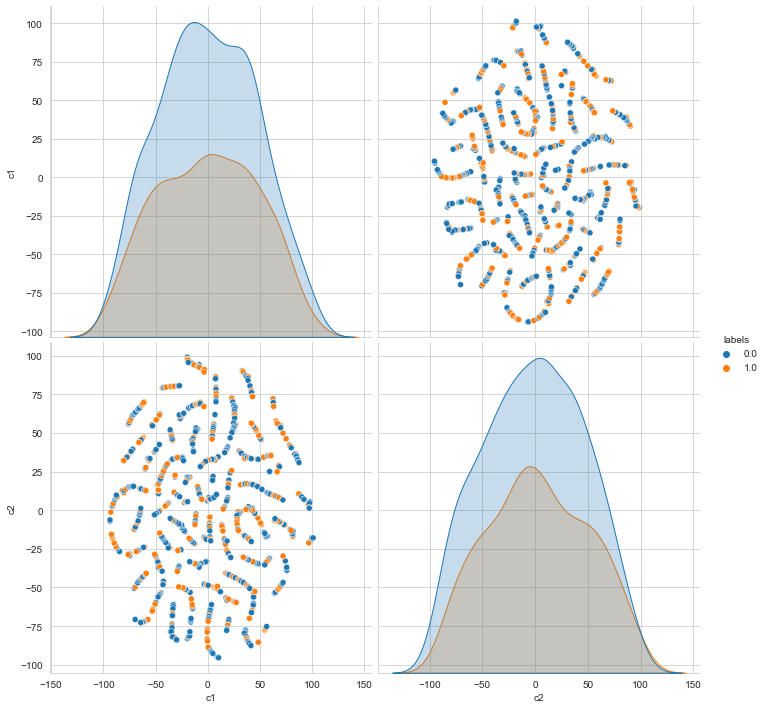

In [142]:
sns.set_style("whitegrid")
sns.pairplot(training_dataframe, hue = "labels" , height = 5)
plt.show()

In [139]:
### training a MLP to see if the accuracy is increased

In [144]:
print(normalized_training_data.shape)
print(normalized_test_data.shape)

(891, 7)
(418, 6)


In [167]:
batch_size = 32
num_epochs = 50

In [180]:
model = tf.keras.Sequential([tf.keras.Input(shape = 6) , 
                             tf.keras.layers.Dense(units = 8 , activation = "relu" ) , 
                             tf.keras.layers.Dense(units = 4, activation = "relu") , 
                             tf.keras.layers.Dense(units = 3 , activation = "relu") , 
                             tf.keras.layers.Dense(units = 1 , activation = "sigmoid")])
model.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])

In [181]:
history = model.fit(training_data , training_labels , batch_size = batch_size , epochs = num_epochs , steps_per_epoch = int(891/batch_size))

Epoch 1/50
27/27 [==============================] - 2s 4ms/step - loss: 0.6867 - accuracy: 0.6266
Epoch 2/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6794 - accuracy: 0.5983
Epoch 3/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6635 - accuracy: 0.6207
Epoch 4/50
27/27 [==============================] - 0s 5ms/step - loss: 0.6605 - accuracy: 0.5956
Epoch 5/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6452 - accuracy: 0.6115
Epoch 6/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6383 - accuracy: 0.6093
Epoch 7/50
27/27 [==============================] - 0s 5ms/step - loss: 0.6106 - accuracy: 0.6421
Epoch 8/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6130 - accuracy: 0.6176
Epoch 9/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6226 - accuracy: 0.5789
Epoch 10/50
27/27 [==============================] - 0s 4ms/step - loss: 0.5829 - accuracy: 0.6280
Epoch 11/50
27/27 [

In [156]:
##3 as we can see that the model is ouer fitting on training data so lets add dropout layer in between

In [177]:
model2 = tf.keras.Sequential([tf.keras.Input(shape = 6) , 
                             tf.keras.layers.Dense(units = 8 , activation = "relu" ) ,
                              tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(units = 4, activation = "relu") ,
                              tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(units = 3 , activation = "relu") , 
                             tf.keras.layers.Dense(units = 1 , activation = "sigmoid")])
model2.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])

In [172]:
history2 = model2.fit(training_data , training_labels , batch_size = batch_size , epochs = num_epochs , steps_per_epoch = int(891/batch_size))

Epoch 1/50
27/27 [==============================] - 2s 4ms/step - loss: 0.6700 - accuracy: 0.6092
Epoch 2/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6543 - accuracy: 0.6330
Epoch 3/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6459 - accuracy: 0.6139
Epoch 4/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6246 - accuracy: 0.6303
Epoch 5/50
27/27 [==============================] - 0s 5ms/step - loss: 0.6181 - accuracy: 0.6299
Epoch 6/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6132 - accuracy: 0.6304
Epoch 7/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6198 - accuracy: 0.6161
Epoch 8/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6056 - accuracy: 0.6437
Epoch 9/50
27/27 [==============================] - 0s 5ms/step - loss: 0.6164 - accuracy: 0.6315
Epoch 10/50
27/27 [==============================] - 0s 5ms/step - loss: 0.6142 - accuracy: 0.6053
Epoch 11/50
27/27 [

In [ ]:
history2 = model2.fit(training_data , training_labels , batch_size = batch_size , epochs = num_epochs , steps_per_epoch = int(891/batch_size))

In [173]:
### training a MLP with high number of neurons

In [178]:
model3 = tf.keras.Sequential([tf.keras.Input(shape = 6) , 
                             tf.keras.layers.Dense(units = 64 , activation = "relu" ) ,
                              tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(units = 32, activation = "relu") ,
                              tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(units = 16 , activation = "relu") , 
                              tf.keras.layers.Dropout(0.5),
                              tf.keras.layers.Dense(units = 4 , activation = "relu") , 
                              tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(units = 1 , activation = "sigmoid")])
model3.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])

In [179]:
history3 = model3.fit(training_data , training_labels , batch_size = batch_size , epochs = num_epochs , steps_per_epoch = int(891/batch_size))

Epoch 1/50
27/27 [==============================] - 2s 5ms/step - loss: 0.6953 - accuracy: 0.5112
Epoch 2/50
27/27 [==============================] - 0s 5ms/step - loss: 0.6771 - accuracy: 0.5745
Epoch 3/50
27/27 [==============================] - 0s 5ms/step - loss: 0.6757 - accuracy: 0.6160
Epoch 4/50
27/27 [==============================] - 0s 5ms/step - loss: 0.6730 - accuracy: 0.5786
Epoch 5/50
27/27 [==============================] - 0s 5ms/step - loss: 0.6463 - accuracy: 0.6138
Epoch 6/50
27/27 [==============================] - 0s 5ms/step - loss: 0.6606 - accuracy: 0.5847
Epoch 7/50
27/27 [==============================] - 0s 5ms/step - loss: 0.6594 - accuracy: 0.6111
Epoch 8/50
27/27 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.5936
Epoch 9/50
27/27 [==============================] - 0s 5ms/step - loss: 0.6292 - accuracy: 0.6110
Epoch 10/50
27/27 [==============================] - 0s 5ms/step - loss: 0.6589 - accuracy: 0.5965
Epoch 11/50
27/27 [

In [182]:
### of all these model first looks decent

In [183]:
predicted_labels = model.predict(normalized_test_data)

In [184]:
predicted_labels.shape

(418, 1)

In [199]:
predicted_labels = predicted_labels.ravel()

In [200]:
predicted_labels.shape

(418,)

In [ ]:
predicted_labels

In [208]:
for i in range(0,418):
    if(predicted_labels[i]<=0.5):
        predicted_labels[i] = 0
    elif(predicted_labels[i]>0.5):
        predicted_labels[i] = 1

In [209]:
predictions = pd.DataFrame({"PassengerId": data_test.PassengerId , "Survived" : predicted_labels})
predictions = predictions.astype("Int32")
predictions.to_csv("my_output4_nn.csv" , index = False)
print("successfull")

successfull


####3 this my output has given accuracy of 76 percent

In [210]:
predictions.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [211]:
### now what i am going to do is train my neural network on dummies output

In [212]:
### we have data as training_data and data_test as test data

In [213]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [214]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [215]:
features = [ 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']


In [216]:
x = pd.get_dummies(data[features])
x_test = pd.get_dummies(data_test[features])

In [217]:
x.head(5)

,Pclass,SibSp,Parch,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2
0,3,1,0,0,1,0,0,1
1,1,1,0,1,0,0,1,0
2,3,0,0,1,0,0,0,1
3,1,1,0,1,0,0,0,1
4,3,0,0,0,1,0,0,1


In [222]:
### training my MLP model

In [223]:
batch_size = 32
num_epochs = 50

model4 = tf.keras.Sequential([tf.keras.Input(shape = 8) , 
                             tf.keras.layers.Dense(units = 8 , activation = "relu" ) , 
                             tf.keras.layers.Dense(units = 4, activation = "relu") , 
                             tf.keras.layers.Dense(units = 3 , activation = "relu") , 
                             tf.keras.layers.Dense(units = 1 , activation = "sigmoid")])
model4.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])

In [226]:
model4.fit(x , training_labels , steps_per_epoch = int(891/batch_size) , epochs = num_epochs , batch_size = batch_size)

Epoch 1/50
27/27 [==============================] - 2s 4ms/step - loss: 0.6732 - accuracy: 0.6410
Epoch 2/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6305 - accuracy: 0.7746
Epoch 3/50
27/27 [==============================] - 0s 4ms/step - loss: 0.5901 - accuracy: 0.7487
Epoch 4/50
27/27 [==============================] - 0s 4ms/step - loss: 0.5797 - accuracy: 0.7545
Epoch 5/50
27/27 [==============================] - ETA: 0s - loss: 0.5549 - accuracy: 0.80 - 0s 4ms/step - loss: 0.5542 - accuracy: 0.8068
Epoch 6/50
27/27 [==============================] - 0s 6ms/step - loss: 0.5686 - accuracy: 0.7698: 0s - loss: 0.5764 - accuracy: 0.76
Epoch 7/50
27/27 [==============================] - 0s 4ms/step - loss: 0.5273 - accuracy: 0.7922
Epoch 8/50
27/27 [==============================] - 0s 4ms/step - loss: 0.5172 - accuracy: 0.8086
Epoch 9/50
27/27 [==============================] - 0s 5ms/step - loss: 0.5034 - accuracy: 0.7882
Epoch 10/50
27/27 [=====================

In [230]:
model4_predictions = model4.predict(x_test)
model4_predictions = model4_predictions.ravel()

In [231]:
for i in range(0,418):
    if(model4_predictions[i]<=0.5):
        model4_predictions[i] = 0
    elif(model4_predictions[i]>0.5):
        model4_predictions[i] = 1
        
predictions = pd.DataFrame({"PassengerId": data_test.PassengerId , "Survived" : model4_predictions})
predictions = predictions.astype("Int32")
predictions.to_csv("model4_predictions.csv" , index = False)
print("successfull")

successfull


In [ ]:
## training_model5 with deep neural

In [234]:
batch_size = 32
num_epochs = 200

model5 = tf.keras.Sequential([tf.keras.Input(shape = 8) , 
                             tf.keras.layers.Dense(units = 64 , activation = "relu" ) ,
                              tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(units = 32, activation = "relu") ,
                              tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(units = 16 , activation = "relu") , 
                              tf.keras.layers.Dropout(0.5),
                              tf.keras.layers.Dense(units = 4 , activation = "relu") , 
                              tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(units = 1 , activation = "sigmoid")])

model5.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])

model5.fit(x , training_labels , steps_per_epoch = int(891/batch_size) , epochs = num_epochs , batch_size = batch_size)

Epoch 1/200
27/27 [==============================] - 2s 5ms/step - loss: 0.8785 - accuracy: 0.5032
Epoch 2/200
27/27 [==============================] - 0s 5ms/step - loss: 0.7222 - accuracy: 0.5265
Epoch 3/200
27/27 [==============================] - 0s 6ms/step - loss: 0.7102 - accuracy: 0.5401
Epoch 4/200
27/27 [==============================] - 0s 5ms/step - loss: 0.6976 - accuracy: 0.5794
Epoch 5/200
27/27 [==============================] - 0s 4ms/step - loss: 0.6873 - accuracy: 0.5899
Epoch 6/200
27/27 [==============================] - 0s 5ms/step - loss: 0.6991 - accuracy: 0.6027
Epoch 7/200
27/27 [==============================] - 0s 5ms/step - loss: 0.6893 - accuracy: 0.5787
Epoch 8/200
27/27 [==============================] - 0s 5ms/step - loss: 0.6810 - accuracy: 0.5983
Epoch 9/200
27/27 [==============================] - 0s 5ms/step - loss: 0.6842 - accuracy: 0.5890
Epoch 10/200
27/27 [==============================] - 0s 6ms/step - loss: 0.6770 - accuracy: 0.6209
Epoch 11/

27/27 [==============================] - 0s 5ms/step - loss: 0.5160 - accuracy: 0.7629
Epoch 82/200
27/27 [==============================] - 0s 5ms/step - loss: 0.4793 - accuracy: 0.7763
Epoch 83/200
27/27 [==============================] - 0s 6ms/step - loss: 0.4892 - accuracy: 0.7746
Epoch 84/200
27/27 [==============================] - 0s 5ms/step - loss: 0.5157 - accuracy: 0.7730
Epoch 85/200
27/27 [==============================] - 0s 4ms/step - loss: 0.5128 - accuracy: 0.7841
Epoch 86/200
27/27 [==============================] - 0s 4ms/step - loss: 0.5470 - accuracy: 0.7255
Epoch 87/200
27/27 [==============================] - 0s 4ms/step - loss: 0.5789 - accuracy: 0.7728
Epoch 88/200
27/27 [==============================] - 0s 4ms/step - loss: 0.5091 - accuracy: 0.7667
Epoch 89/200
27/27 [==============================] - 0s 3ms/step - loss: 0.5061 - accuracy: 0.7664
Epoch 90/200
27/27 [==============================] - 0s 3ms/step - loss: 0.4882 - accuracy: 0.7738
Epoch 91/200


Epoch 162/200
27/27 [==============================] - 0s 6ms/step - loss: 0.5162 - accuracy: 0.7512
Epoch 163/200
27/27 [==============================] - 0s 7ms/step - loss: 0.5061 - accuracy: 0.7526
Epoch 164/200
27/27 [==============================] - 0s 5ms/step - loss: 0.4664 - accuracy: 0.8084
Epoch 165/200
27/27 [==============================] - 0s 4ms/step - loss: 0.4867 - accuracy: 0.7861
Epoch 166/200
27/27 [==============================] - 0s 4ms/step - loss: 0.4645 - accuracy: 0.7953
Epoch 167/200
27/27 [==============================] - 0s 4ms/step - loss: 0.4715 - accuracy: 0.7901
Epoch 168/200
27/27 [==============================] - 0s 4ms/step - loss: 0.5136 - accuracy: 0.7694
Epoch 169/200
27/27 [==============================] - 0s 3ms/step - loss: 0.5085 - accuracy: 0.7493
Epoch 170/200
27/27 [==============================] - 0s 4ms/step - loss: 0.4917 - accuracy: 0.7744
Epoch 171/200
27/27 [==============================] - 0s 4ms/step - loss: 0.5138 - accurac

In [235]:
### this model is not decent